In [1]:
# Manipulação de Dados
import pandas as pd
from pandasql import sqldf as psql
import numpy as np

# EDA
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic
from summarytools import dfSummary

# Modelagem
from sklearn.model_selection import train_test_split, KFold
from sklearn.inspection import permutation_importance

from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from category_encoders import CatBoostEncoder

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import optuna as opt
from sklearn.model_selection import cross_val_score

# Parâmetros de visualização
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
order_items = pd.read_csv('olist_order_items_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')

In [3]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [8]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [9]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [10]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [11]:
df1 = pd.merge(orders, order_items, on='order_id')

In [12]:
df2 = pd.merge(df1, products, on='product_id')

In [13]:
df3 = pd.merge(df2, customers, on='customer_id')

In [14]:
df4 = pd.merge(df3, reviews, on='order_id')

In [15]:
df5 = pd.merge(df4, payments, on='order_id')

In [16]:
df = pd.merge(df5, sellers, on='seller_id')

In [17]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,1,credit_card,3,37.77,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,1,credit_card,1,37.77,9350,maua,SP


In [18]:
print(f'A tabela final possui {df.shape[0]} linhas e {df.shape[1]} colunas.')

A tabela final possui 117329 linhas e 39 colunas.


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   order_item_id                  117329 non-null  int64  
 9   product_id                     117329 non-null  object 
 10  seller_id                      117329 non-null  object 
 11  shipping_limit_date            117329 non-null  object 
 12  price                         

In [20]:
df.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix
count,117329.000000,117329.000000,117329.000000,115634.000000,115634.000000,115634.000000,117309.000000,117309.000000,117309.000000,117309.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000
mean,1.194121,120.524349,20.027514,48.768018,785.802861,2.205528,2110.763062,30.254456,16.612476,23.071452,35060.118112,4.031467,1.094452,2.940151,172.062565,24450.781955
std,0.684225,182.944843,15.828077,10.033831,652.382965,1.717783,3785.128931,16.177519,13.452625,11.745875,29849.496175,1.387927,0.731174,2.775370,265.388194,27582.364358
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1.000000,1.000000,0.000000,0.000000,1001.000000
25%,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11250.000000,4.000000,1.000000,1.000000,60.750000,6429.000000
50%,1.000000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24240.000000,5.000000,1.000000,2.000000,108.100000,13660.000000
75%,1.000000,134.900000,21.180000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,58770.000000,5.000000,1.000000,4.000000,189.060000,28035.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99990.000000,5.000000,29.000000,24.000000,13664.080000,99730.000000


In [21]:
valores_nulos = df.isna().sum()

In [22]:
valores_nulos = pd.DataFrame({'Nome da Coluna': valores_nulos.index, 'Quantidade de Valores Nulos': valores_nulos.values})

In [23]:
valores_nulos

,Nome da Coluna,Quantidade de Valores Nulos
0,order_id,0
1,customer_id,0
2,order_status,0
3,order_purchase_timestamp,0
4,order_approved_at,15
5,order_delivered_carrier_date,1235
6,order_delivered_customer_date,2471
7,order_estimated_delivery_date,0
8,order_item_id,0
9,product_id,0


<Axes: >

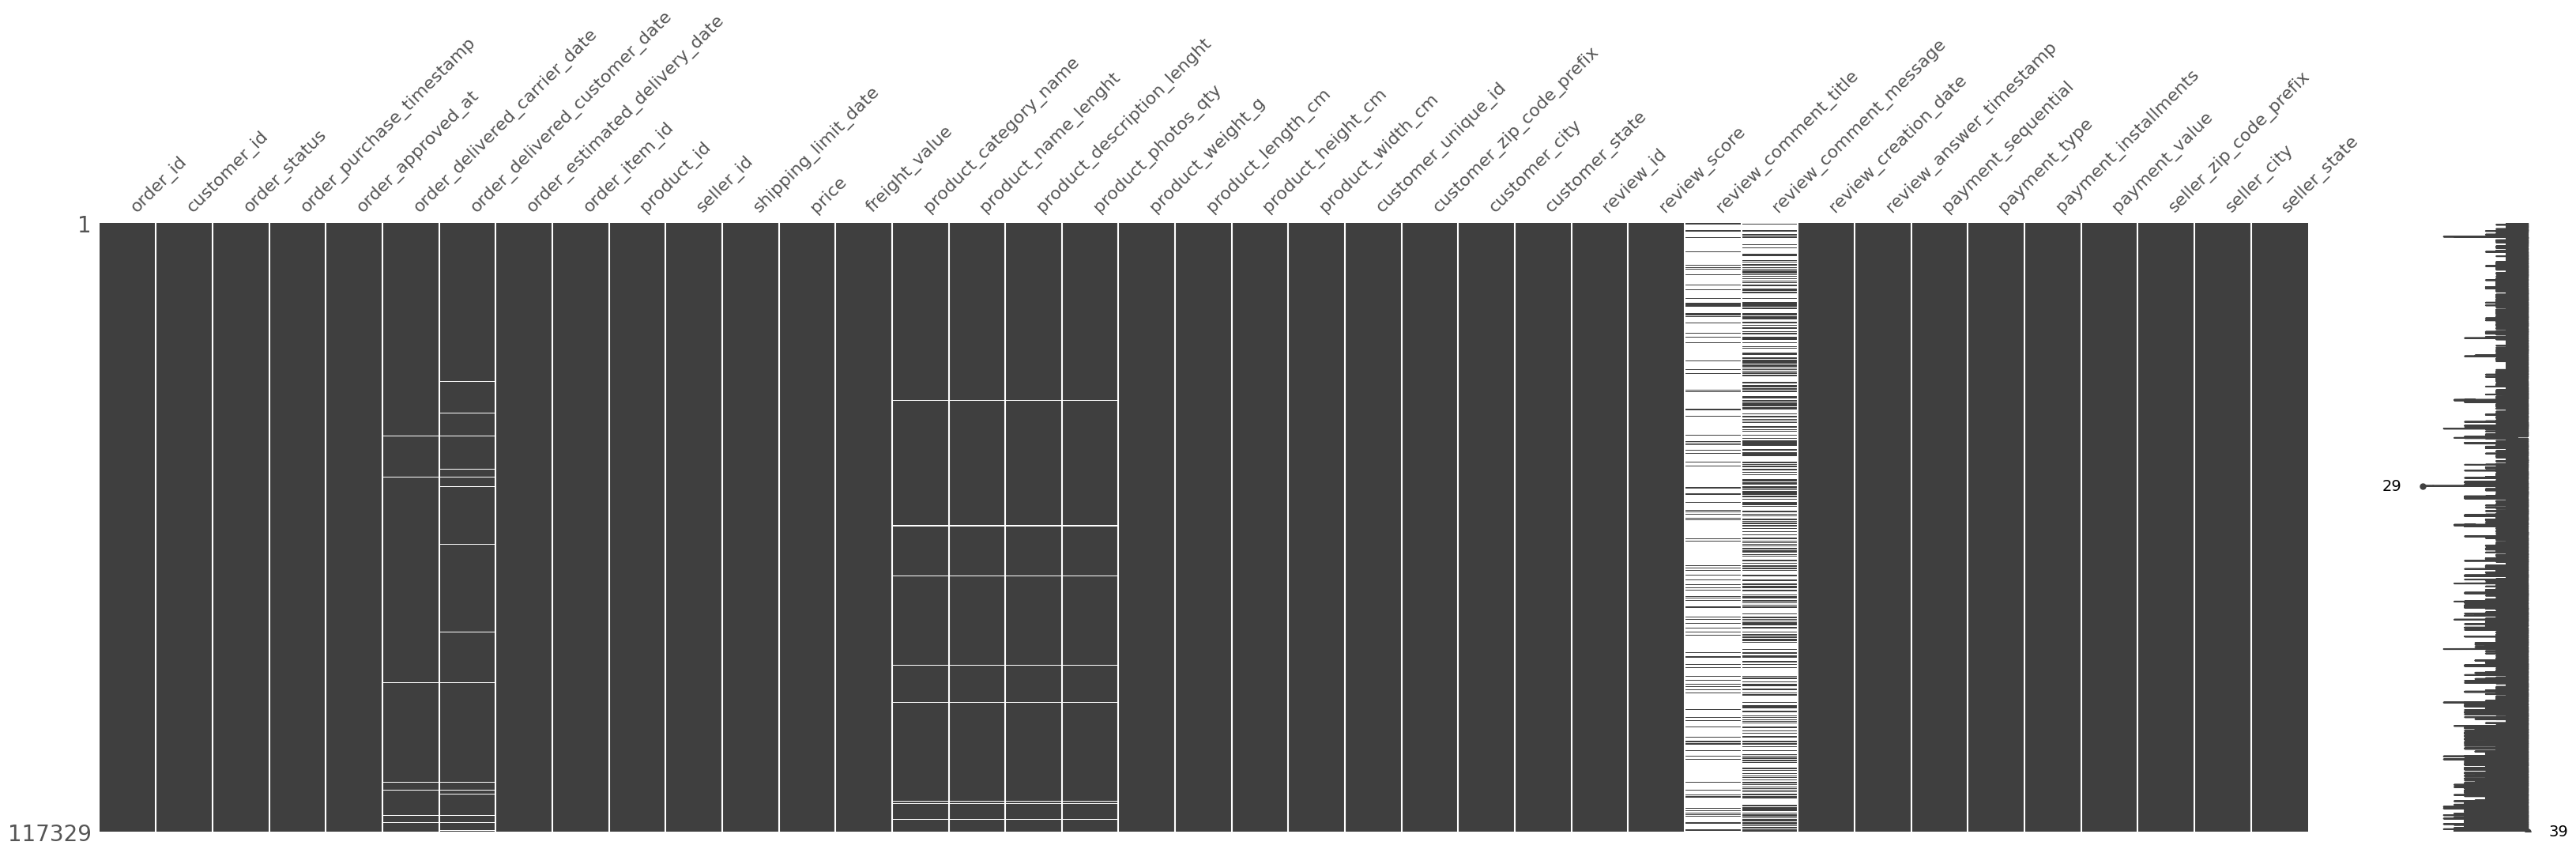

In [24]:
missingno.matrix(df, figsize=(40, 10))

In [25]:
linhas, colunas = df.shape

In [26]:
perc_null = ((df.isna().sum()/linhas)*100).round(2)
perc_null

order_id                          0.00
customer_id                       0.00
order_status                      0.00
order_purchase_timestamp          0.00
order_approved_at                 0.01
order_delivered_carrier_date      1.05
order_delivered_customer_date     2.11
order_estimated_delivery_date     0.00
order_item_id                     0.00
product_id                        0.00
seller_id                         0.00
shipping_limit_date               0.00
price                             0.00
freight_value                     0.00
product_category_name             1.44
product_name_lenght               1.44
product_description_lenght        1.44
product_photos_qty                1.44
product_weight_g                  0.02
product_length_cm                 0.02
product_height_cm                 0.02
product_width_cm                  0.02
customer_unique_id                0.00
customer_zip_code_prefix          0.00
customer_city                     0.00
customer_state           

In [27]:
contagem = pd.DataFrame(columns=['Variável', 'Quantidade_Distintos'])

for colunas in df.columns:
    dados = pd.DataFrame({'Variável': [colunas], 'Quantidade_Distintos': df[colunas].value_counts().shape[0]})
    contagem = pd.concat([contagem, dados], ignore_index=True)

contagem.sort_values(by='Quantidade_Distintos')

,Variável,Quantidade_Distintos
33,payment_type,4
27,review_score,5
2,order_status,7
17,product_photos_qty,19
8,order_item_id,21
38,seller_state,23
34,payment_installments,24
25,customer_state,27
32,payment_sequential,29
15,product_name_lenght,66


In [28]:
payment_counts = df['payment_type'].value_counts().reset_index()
payment_counts.columns = ['Tipo_pagamento', 'valores']
payment_counts

,Tipo_pagamento,valores
0,credit_card,86520
1,boleto,22835
2,voucher,6282
3,debit_card,1692


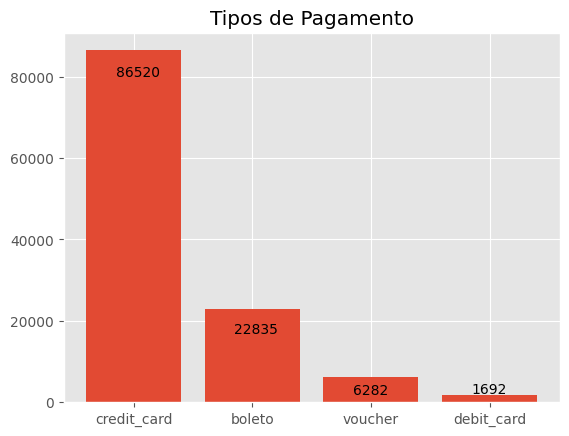

In [29]:
plt.bar(data=payment_counts, x='Tipo_pagamento', height='valores')

plt.title('Tipos de Pagamento')
_ = plt.text(-0.15, 8e4, payment_counts.valores[0])
_ = plt.text(0.85, 17e3, payment_counts.valores[1])
_ = plt.text(1.85, 2e3, payment_counts.valores[2])
_ = plt.text(2.85, 2.2e3, payment_counts.valores[3])

_ = plt.plot()

In [30]:
df_numeric = df.select_dtypes(include=[np.number])
df_categories = df.select_dtypes(include=[object])

<Axes: title={'center': 'Correlação entre Variáveis'}>

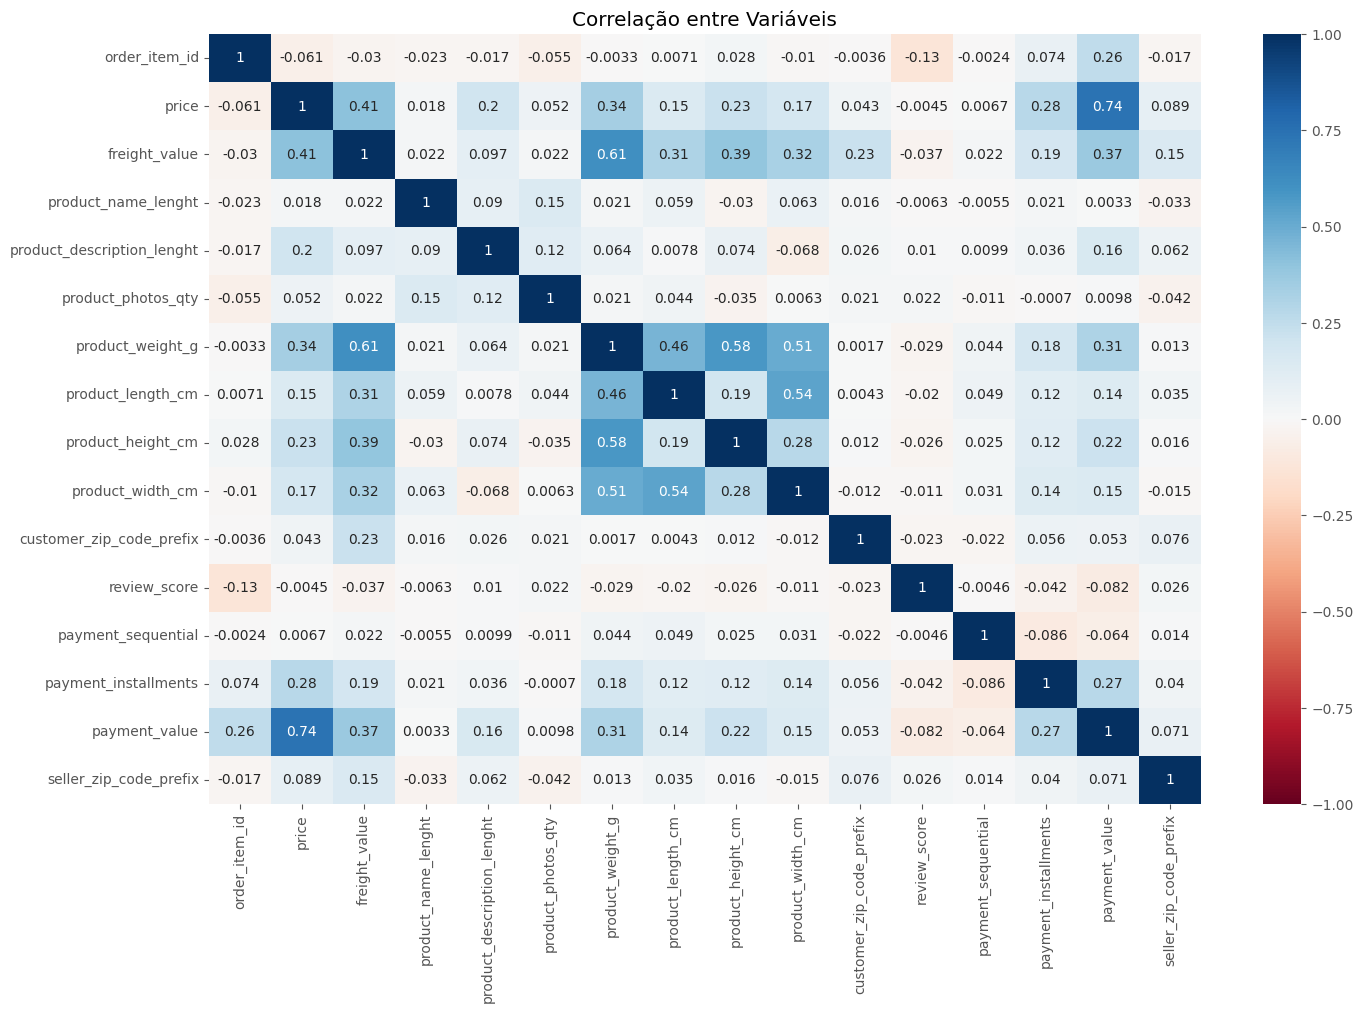

In [31]:
plt.figure(figsize=(16,10))

plt.title('Correlação entre Variáveis')

sns.heatmap(df_numeric.corr(), annot=True, vmin=-1, vmax=1, cmap='RdBu')

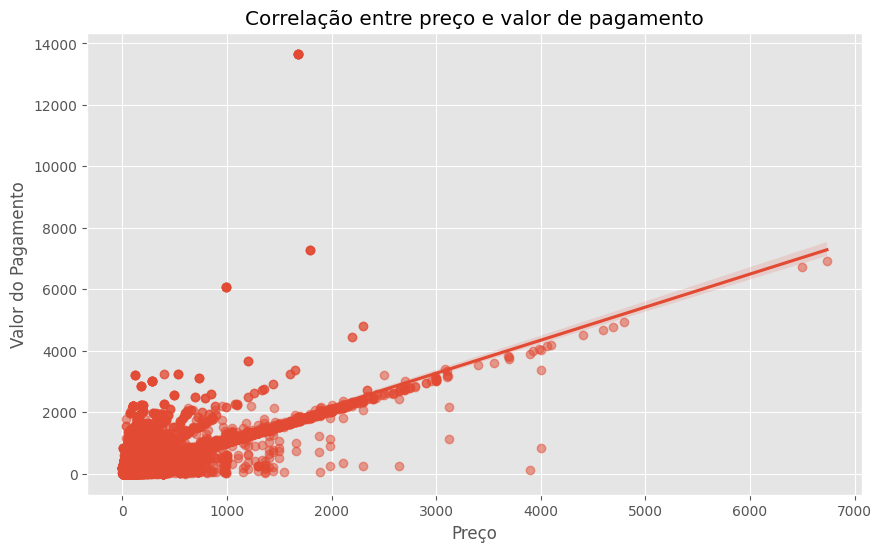

In [32]:
_ = plt.figure(figsize=(10, 6))
_ = sns.regplot(x='price', y='payment_value', data=df, scatter_kws=({'alpha':0.5}))
_ = plt.title('Correlação entre preço e valor de pagamento')
_ = plt.xlabel('Preço')
_ = plt.ylabel('Valor do Pagamento')
_ = plt.show()

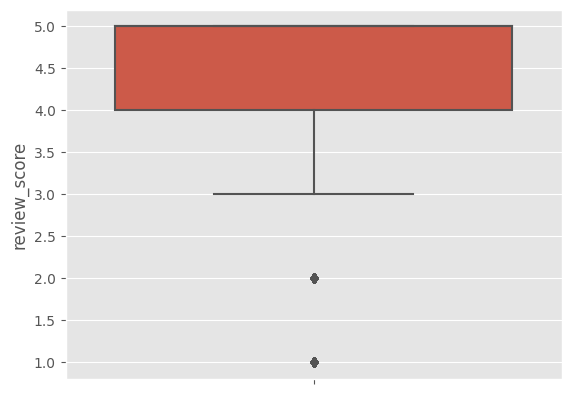

In [33]:
fig = sns.boxplot(y='review_score', data=df)
_ = plt.xticks(rotation=90)

In [34]:
df.review_score.describe()

count    117329.000000
mean          4.031467
std           1.387927
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review_score, dtype: float64

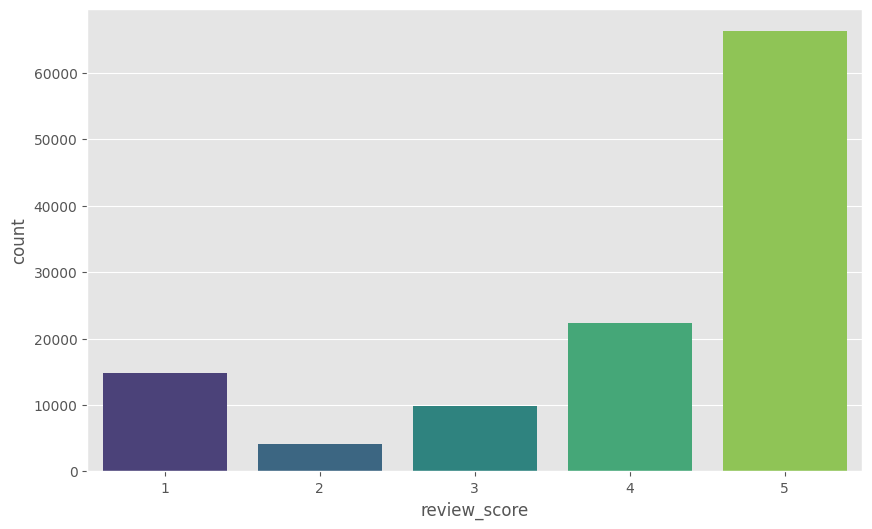

In [35]:
plt.figure(figsize=(10, 6))
_ = sns.countplot(data=df, x='review_score', palette='viridis')

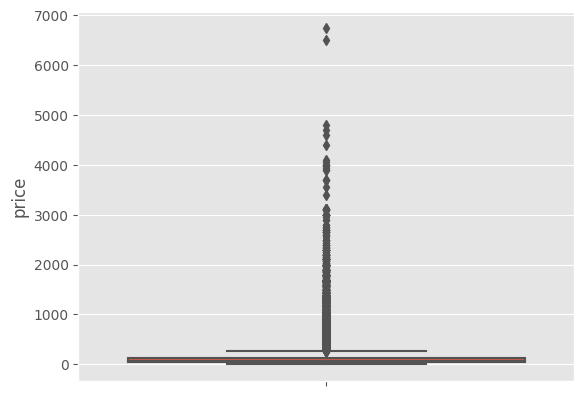

In [36]:
fig = sns.boxplot(y='price', data=df)
_ = fig

In [37]:
df.price.describe()

count    117329.000000
mean        120.524349
std         182.944843
min           0.850000
25%          39.900000
50%          74.900000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [38]:
query = 'SELECT DISTINCT order_id, sum(price) FROM order_items GROUP BY order_id'
result = psql(query, globals())
result.describe()

,sum(price)
count,98666.000000
mean,137.754076
std,210.645145
min,0.850000
25%,45.900000
50%,86.900000
75%,149.900000
max,13440.000000


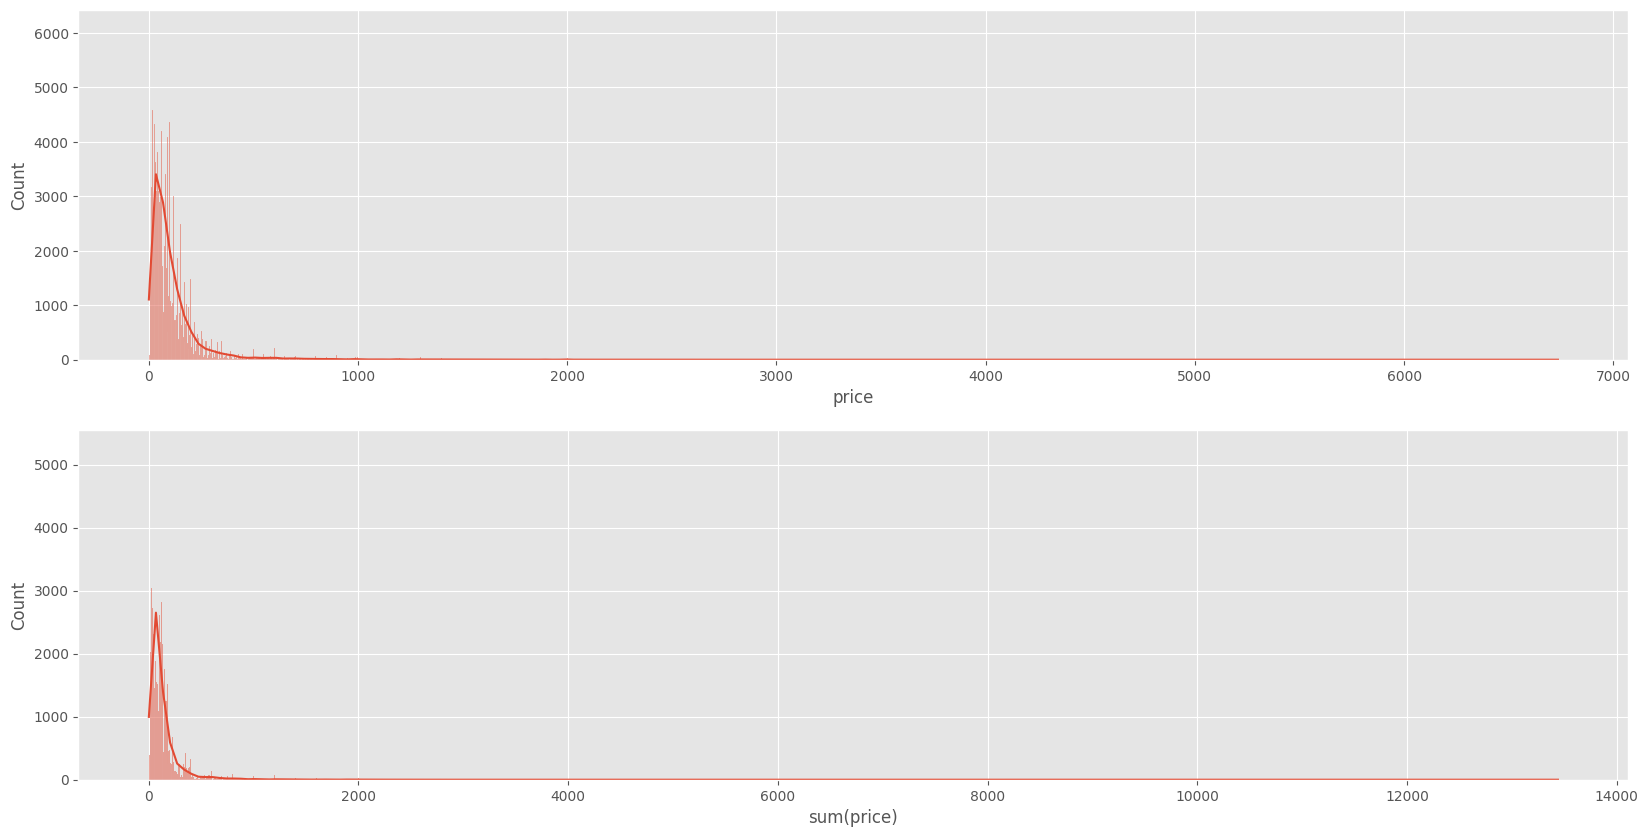

In [39]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
_ = sns.histplot(data=df, x='price', ax=axes[0], kde=True)
_ = sns.histplot(data=result, x='sum(price)', ax=axes[1], kde=True)

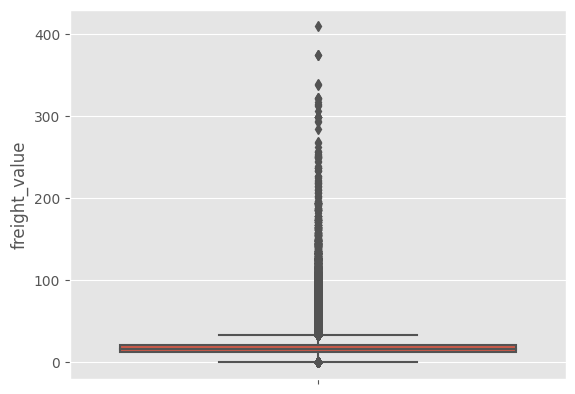

In [40]:
fig = sns.boxplot(y='freight_value', data=df)
_ = plt.show()

In [41]:
df.freight_value.describe()

count    117329.000000
mean         20.027514
std          15.828077
min           0.000000
25%          13.080000
50%          16.280000
75%          21.180000
max         409.680000
Name: freight_value, dtype: float64

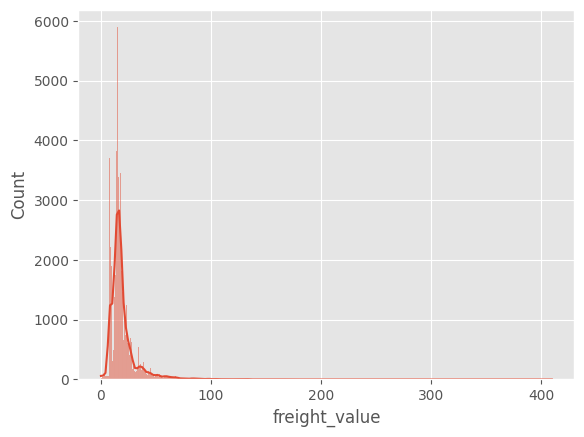

In [42]:
fig= plt.plot(figsize=(20, 10))
_ = sns.histplot(data=df, x='freight_value', kde=True)

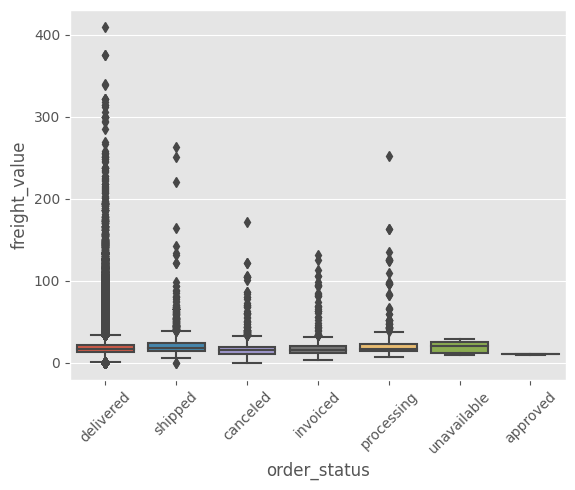

In [43]:
fig= plt.plot(figsize=(20, 10))
_ = sns.boxplot(data=df, x='order_status', y='freight_value')
_ = plt.xticks(rotation=45)

In [44]:
def feature_engineering(data):
    conversion_columns = data.iloc[:, 3:8]
    data.iloc[:, 3:8] = conversion_columns.apply(pd.to_datetime)

    data['tempo_entrega'] = (data.order_delivered_customer_date - data.order_purchase_timestamp).dt.days
    data['tempo_entrega'] = data.tempo_entrega.astype(float)

    data['tempo_entrega_estimada'] = (data.order_estimated_delivery_date - data.order_purchase_timestamp).dt.days
    data['tempo_entrega_estimada'] = data.tempo_entrega_estimada.astype(float)
    
    data['tempo_processamento_minutos'] = ((data.order_approved_at - data.order_purchase_timestamp).dt.seconds/60).round(0)
    data['tempo_processamento_minutos'] = data.tempo_processamento_minutos.astype(float)
    
    data['mes_compra'] = data['order_purchase_timestamp'].dt.month
    data['dia_semana_compra'] = data['order_purchase_timestamp'].dt.dayofweek

    data['product_volume'] = data['product_height_cm'] * data['product_width_cm'] * data['product_length_cm']

    data['product_density'] = data['product_weight_g'] / data['product_volume']

    return data

In [45]:
feature_engineering(df)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,tempo_entrega,tempo_entrega_estimada,tempo_processamento_minutos,mes_compra,dia_semana_compra,product_volume,product_density
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,9350,maua,SP,8.0,15.0,11.0,10,0,1976.0,0.253036
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,9350,maua,SP,8.0,15.0,11.0,10,0,1976.0,0.253036
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,9350,maua,SP,8.0,15.0,11.0,10,0,1976.0,0.253036
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,1,credit_card,3,37.77,9350,maua,SP,2.0,12.0,96.0,8,1,1976.0,0.253036
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,1,credit_card,1,37.77,9350,maua,SP,5.0,12.0,18.0,8,2,1976.0,0.253036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 1

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117329 non-null  object        
 1   customer_id                    117329 non-null  object        
 2   order_status                   117329 non-null  object        
 3   order_purchase_timestamp       117329 non-null  datetime64[ns]
 4   order_approved_at              117314 non-null  datetime64[ns]
 5   order_delivered_carrier_date   116094 non-null  datetime64[ns]
 6   order_delivered_customer_date  114858 non-null  datetime64[ns]
 7   order_estimated_delivery_date  117329 non-null  datetime64[ns]
 8   order_item_id                  117329 non-null  int64         
 9   product_id                     117329 non-null  object        
 10  seller_id                      117329 non-null  object        
 11  

In [47]:
def geolocation_agg(data):
    data = data.groupby(by='geolocation_zip_code_prefix').agg(

        {'geolocation_lat': 'mean', 'geolocation_lng': 'mean'}
        
        ).reset_index()

    return data

In [48]:
aggregated_geolocation = geolocation_agg(geolocation)

In [49]:
aggregated_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979
2,1003,-23.548994,-46.635731
3,1004,-23.549799,-46.634757
4,1005,-23.549456,-46.636733


In [50]:
df = pd.merge(df, aggregated_geolocation, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')
df.rename(columns={'geolocation_lat': 'seller_lat', 'geolocation_lng': 'seller_lng'}, inplace=True)
df.drop(columns='geolocation_zip_code_prefix', inplace=True)

In [51]:
df = pd.merge(df, aggregated_geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
df.rename(columns={'geolocation_lat': 'customer_lat', 'geolocation_lng': 'customer_lng'}, inplace=True)
df.drop(columns='geolocation_zip_code_prefix', inplace=True)

In [52]:
def calc_distance(data):
    seller_coord = (data['seller_lat'], data['seller_lng'])
    customer_coord = (data['customer_lat'], data['customer_lng'])
    
    return geodesic(seller_coord, customer_coord).kilometers

In [53]:
df['distancia'] = df.apply(calc_distance, axis=1)

In [54]:
df.drop(columns=['seller_lat', 'seller_lng', 'customer_lat', 'customer_lng'], inplace=True)

In [55]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,tempo_entrega,tempo_entrega_estimada,tempo_processamento_minutos,mes_compra,dia_semana_compra,product_volume,product_density,distancia
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,9350,maua,SP,8.0,15.0,11.0,10,0,1976.0,0.253036,18.566632
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,9350,maua,SP,8.0,15.0,11.0,10,0,1976.0,0.253036,18.566632
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,9350,maua,SP,8.0,15.0,11.0,10,0,1976.0,0.253036,18.566632
3,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,1,6cc44821f36f3156c782da72dd634e47,da8622b14eb17ae2831f4ac5b9dab84a,2018-03-28 18:05:36,99.90,11.79,cama_mesa_banho,55.0,273.0,1.0,1050.0,38.0,10.0,38.0,8a4002923e801e3120a11070fd31c9e2,3149,sao paulo,SP,3cd186b6013f4145b9bd406847b61f19,5,NaN,Nâo sabia da entrega aos domingos pelo correio...,2018-03-26 00:00:00,2018-03-27 02:21:27,1,credit_card,2,223.38,13405,piracicaba,SP,2.0,12.0,42.0,3,3,14440.0,0.072715,146.370789
4,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,2,6cc44821f36f3156c782da72dd634e47,da8622b14eb17ae2831f4ac5b9dab84a,2018-03-28 18:05:36,99.90,11.79,cama_mesa_banho,55.0,273.0,1.0,1050.0,38.0,10.0,38.0,8a4002923e801e3120a11070fd31c9e2,3149,sao paulo,SP,3cd186b6013f4145b9bd406847b61f19,5,NaN,Nâo sabia da entrega aos domingos pelo correio...,2018-03-26 00:00:00,2018-03-27 02:21:27,1,credit_card,2,223.38,13405,piracicaba,SP,2.0,12.0,42.0,3,3,14440.0,0.072715,146.370789


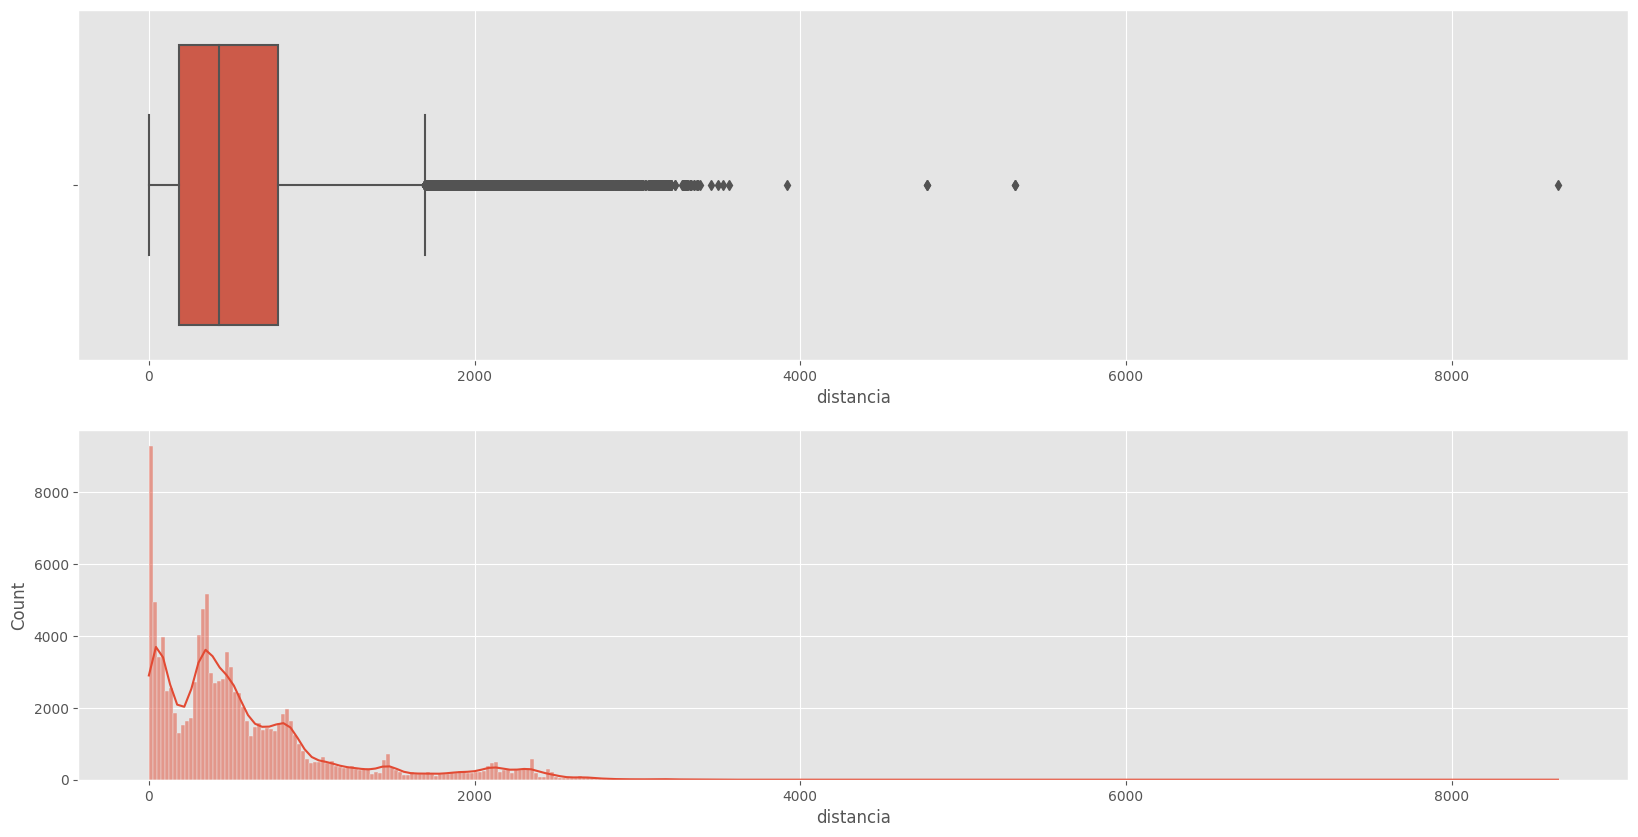

In [56]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
_ = sns.boxplot(data=df, x='distancia', ax=axes[0])
_ = sns.histplot(data=df, x='distancia', kde=True, ax=axes[1])

In [57]:
df.distancia.describe()

count    116750.000000
mean        595.388652
std         586.709521
min           0.000000
25%         186.934233
50%         431.120644
75%         790.094537
max        8652.119722
Name: distancia, dtype: float64

In [58]:
columns_to_drop = [
             'order_id',
             'customer_id',
             'product_id',
             'seller_id',
             'order_status',
             'order_purchase_timestamp',
             'order_approved_at',
             'order_delivered_carrier_date',
             'order_delivered_customer_date',
             'order_estimated_delivery_date',
             'shipping_limit_date',
             'product_description_lenght',
             'product_name_lenght',
             'product_photos_qty',
             'customer_unique_id',
             'review_id',
             'review_comment_title',
             'review_comment_message',
             'review_creation_date',
             'review_answer_timestamp',
             'payment_sequential',
             'payment_type',
             'payment_installments',
             'payment_value',
             'seller_zip_code_prefix',
             'order_item_id',
             'customer_zip_code_prefix'
]

In [59]:
df.drop(columns=columns_to_drop, inplace=True)

In [60]:
df.duplicated().value_counts()

False    101106
True      15644
dtype: int64

In [61]:
df.drop_duplicates(inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101106 entries, 0 to 116749
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   price                        101106 non-null  float64
 1   freight_value                101106 non-null  float64
 2   product_category_name        99663 non-null   object 
 3   product_weight_g             101090 non-null  float64
 4   product_length_cm            101090 non-null  float64
 5   product_height_cm            101090 non-null  float64
 6   product_width_cm             101090 non-null  float64
 7   customer_city                101106 non-null  object 
 8   customer_state               101106 non-null  object 
 9   review_score                 101106 non-null  int64  
 10  seller_city                  101106 non-null  object 
 11  seller_state                 101106 non-null  object 
 12  tempo_entrega                98985 non-null   float64
 13 

MODELAGEM

In [63]:
X = df.drop(columns='freight_value', axis=1)
y = df.freight_value

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
model_XGBoost = XGBRegressor(n_estimators=500, max_depth=8, learning_rate=1e-3, n_jobs=-1, random_state=0)
model_LightGBM = LGBMRegressor(n_estimators=1000, max_depth=8, num_leaves=2, learning_rate=1e-3, n_jobs=-1, verbose=-1, random_state=0)
model_CatBoost = CatBoostRegressor(n_estimators=1000, max_depth=8, learning_rate=1e-3, verbose=0, random_state=0)
model_Tree = DecisionTreeRegressor(random_state=0, max_depth=8, min_samples_split=2)

In [66]:
class EncoderImportance:

    def __init__(self, encoder, model) -> None:
        self.encoder = encoder
        self.model = model
        self.best_params = None


    def calculate_importance(self, X_train, X_test, y_train, y_test):
        for col in X_train.select_dtypes(include=['object']).columns:
            X_train[col] = self.encoder.fit_transform(X_train[col], y_train)
            X_test[col] = self.encoder.transform(X_test[col])

        self.model.fit(X_train, y_train)

        importance = permutation_importance(self.model, X_test, y_test, n_repeats=30,
                                            random_state=42)
        
        importances = pd.DataFrame({'Feature': X_test.columns, 
                                    'Importance': importance.importances_mean})
        
        importances = importances.sort_values(by='Importance', ascending=False)

        return importances
    

    def cross_validate(self, X, y, k):
        folds = KFold(n_splits=k, shuffle=True, random_state=0)

        absolute_error = list()
        squared_error = list()
        r2 = list()

        for k, (train_index, test_index) in enumerate(folds.split(X, y)):

            print('#-'*8 + f'Fold: {k+1}' + '#-'*8)

            X_train_i, y_train_i = X.iloc[train_index, :], y.iloc[train_index]
            X_test_i, y_test_i = X.iloc[test_index, :], y.iloc[test_index]

            encoder = CatBoostEncoder()

            cat_imputer = SimpleImputer(strategy='most_frequent')
            num_imputer = SimpleImputer(strategy='median')

            cat_pipeline = Pipeline(
                [
                    ('encoder', encoder),
                    ('imputer', cat_imputer)
                ]
            )

            num_pipeline = Pipeline(
                [
                    ('imputer', num_imputer)
                ]
            )

            cat_cols = X_train_i.select_dtypes(include=['object']).columns
            num_cols = X_train_i.select_dtypes(exclude=['object']).columns

            X_train_i[cat_cols] = cat_pipeline.fit_transform(
                X_train_i[cat_cols], y_train_i)

            X_train_i[num_cols] = num_pipeline.fit_transform(
                X_train_i[num_cols])

            X_test_i[cat_cols] = cat_pipeline.transform(
                X_test_i[cat_cols])

            X_test_i[num_cols] = num_pipeline.transform(
                X_test_i[num_cols])

            self.model.fit(X_train_i, y_train_i)

            y_pred = self.model.predict(X_test_i)

            r2score = r2_score(y_test_i, y_pred)
            mse = mean_squared_error(y_test_i, y_pred)
            mae = mean_absolute_error(y_test_i, y_pred)

            r2.append(r2score)
            squared_error.append(mse)
            absolute_error.append(mae)

            print(f'R2: {r2score:.3f}')
            print(f'MSE: {mse:.3f}')
            print(f'MAE: {mae:.3f}')

        r2 = np.array(r2)
        squared_errors = np.array(squared_error)
        absolute_errors = np.array(absolute_error)

        mean_r2 = np.mean(r2)
        mean_mse = np.mean(squared_errors)
        mean_mae = np.mean(absolute_errors)

        std_r2 = np.std(r2)
        std_mse = np.std(squared_errors)
        std_mae = np.std(absolute_errors)

        print('#-'*8 + f' Exibindo Métricas ' + '-#'*8)

        print(f'Média R2: {mean_r2} +- {std_r2}')
        print(f'Média MSE: {mean_mse} +- {std_mse}')
        print(f'Média MAE: {mean_mae} +- {std_mae}')


    def tune_parameters(self, X, y, param_grid, n_trials, cv):
        def objective(trial):
            params = {key: trial.suggest_categorical(key, values) for key, values in param_grid.items()}

            self.model.set_params(**params)
            scores = cross_val_score(self.model, X, y, cv=cv, scoring='neg_mean_squared_error')
            return -scores.mean()
        
        study = opt.create_study(direction='minimize')
        study.optimize(objective, n_trials=n_trials)
        self.best_params = study.best_params

        trial = study.best_trial

        print('Best Trial:')
        print(f'Value: {trial.value}')
        
        print('Params:')
        for key, value in trial.params.items():
            print(f'{key}: {value}')


    def model_fit_predict(self, X_train, X_test, y_train, y_test):

        self.model.set_params(**self.best_params)
        self.model.fit(X_train, y_train)

        y_pred = self.model.predict(X_test)

        r2score = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        print(f'R2: {r2score:.3f}')
        print(f'MSE: {mse:.3f}')
        print(f'MAE: {mae:.3f}')


In [67]:
evaluator = EncoderImportance(CatBoostEncoder(), model_XGBoost)

In [68]:
feature_importance = evaluator.calculate_importance(X_train, X_test, y_train, y_test)
feature_importance

,Feature,Importance
16,product_volume,0.153580
18,distancia,0.137994
2,product_weight_g,0.110246
0,price,0.090611
9,seller_city,0.020443
7,customer_state,0.017473
10,seller_state,0.013553
3,product_length_cm,0.011051
17,product_density,0.004949
6,customer_city,0.003906


In [69]:
last_columns = feature_importance[feature_importance['Importance'] <= 0]
last_columns = last_columns.Feature.values.tolist()
last_columns

['dia_semana_compra',
 'review_score',
 'tempo_entrega',
 'product_category_name',
 'tempo_processamento_minutos',
 'tempo_entrega_estimada']

In [70]:
X_train.drop(columns=last_columns, inplace=True)
X_test.drop(columns=last_columns, inplace=True)

In [71]:
feature_importance_v2 = evaluator.calculate_importance(X_train, X_test, y_train, y_test)
feature_importance_v2

,Feature,Importance
10,product_volume,0.157695
12,distancia,0.142734
1,product_weight_g,0.107723
0,price,0.092056
7,seller_city,0.021390
6,customer_state,0.016165
8,seller_state,0.013407
2,product_length_cm,0.009388
5,customer_city,0.006088
11,product_density,0.005184


In [72]:
model1 = evaluator.cross_validate(X, y, k=5)
model1

#-#-#-#-#-#-#-#-Fold: 1#-#-#-#-#-#-#-#-
R2: -0.116
MSE: 284.012
MAE: 11.921
#-#-#-#-#-#-#-#-Fold: 2#-#-#-#-#-#-#-#-
R2: -0.133
MSE: 262.910
MAE: 11.660
#-#-#-#-#-#-#-#-Fold: 3#-#-#-#-#-#-#-#-
R2: -0.070
MSE: 303.519
MAE: 12.010
#-#-#-#-#-#-#-#-Fold: 4#-#-#-#-#-#-#-#-
R2: -0.130
MSE: 268.828
MAE: 11.705
#-#-#-#-#-#-#-#-Fold: 5#-#-#-#-#-#-#-#-
R2: -0.113
MSE: 283.858
MAE: 11.893
#-#-#-#-#-#-#-#- Exibindo Métricas -#-#-#-#-#-#-#-#
Média R2: -0.11218771122769855 +- 0.022267166430851575
Média MSE: 280.62515353025117 +- 14.135654314777865
Média MAE: 11.837799327875526 +- 0.13333772667842975


In [73]:
param_grid = {
    'n_estimators': [1000],
    'random_state': [42],
    'learning_rate': [1e-3, 1e-2, 1e-1],
    'max_depth': [1, 5, 10],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0]
}

In [74]:
evaluator.tune_parameters(X_train, y_train, param_grid, n_trials=20, cv=5)

[I 2024-02-12 13:22:32,987] A new study created in memory with name: no-name-786578c5-5a2f-457a-a4c6-ac8f1943ddbc


[I 2024-02-12 15:05:03,681] Trial 19 finished with value: 59.68837579786416 and parameters: {'n_estimators': 1000, 'random_state': 42, 'learning_rate': 0.01, 'max_depth': 10, 'subsample': 0.8, 'colsample_bytree': 0.5, 'num_leaves': 15}. Best is trial 2 with value: 59.00223052686808.


Best Trial:
Value: 59.00223052686808
Params:
n_estimators: 1000
random_state: 42
learning_rate: 0.01
max_depth: 10
subsample: 0.5
colsample_bytree: 1.0
num_leaves: 10


In [75]:
evaluator.model_fit_predict(X_train, X_test, y_train, y_test)

R2: 0.765
MSE: 66.477
MAE: 3.593


In [ ]:
_ = plt.figure(figsize=(10, 6))
_ = sns.regplot(x='freight_value', y='payment_value', data=df, scatter_kws=({'alpha':0.5}))
_ = plt.title('Correlação entre preço e valor de pagamento')
_ = plt.xlabel('Preço')
_ = plt.ylabel('Valor do Pagamento')
_ = plt.show()